## Configuración del Entorno y Librerías

### Librerias

In [108]:
!pip install ace_tools


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from tabulate import tabulate
from itertools import product

# Encoding
from sklearn.preprocessing import OrdinalEncoder


# Modelos de Machine Learning
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import fbeta_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Boost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from sklearn.model_selection import cross_val_score


# Preprocesamiento
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Model Selection y Validación
from sklearn.model_selection import (
    train_test_split, cross_val_score, learning_curve, validation_curve
)

# Métricas
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, precision_score, recall_score, f1_score
)

# Display modelo
from IPython.display import display

# Guardar el modelo
import joblib

## Carga de Datos

In [110]:
data = pd.read_csv(r'docs\Propensity_input.csv', delimiter=';')

display(data)

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,Campanna2,Campanna3,Zona _Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Revisiones,Edad Cliente
0,CLIX1,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,...,NO,NO,Medio,NO DATA,No,NO,2892,0,1,20
1,CLIX2,A,TIPO1,FUEL 1,Baja,M,Otros,SOLTERO,M,Empresa,...,NO,NO,Alto,SI,Averia leve,NO,2892,17967,1,55
2,CLIX3,A,TIPO1,FUEL 1,Baja,M,Contado,SOLTERO,F,Empresa,...,NO,NO,Medio-Bajo,NO DATA,Averia grave,NO,1376,0,1,18
3,CLIX4,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,...,NO,NO,Alto,SI,No,NO,2594,6219,1,37
4,CLIX5,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,F,Empresa,...,NO,NO,Medio-Bajo,NO DATA,Averia muy grave,SI,1376,0,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11480,CLIX11481,E,TIPO2,FUEL 1,Media,M,Otros,CASADO,M,Empresa,...,SI,NO,Alto,SI,No,NO,2881,5186,6,44
11481,CLIX11482,E,TIPO2,FUEL 1,Media,M,Contado,CASADO,M,Empresa,...,NO,NO,Medio-Bajo,SI,No,NO,2881,5167,4,58
11482,CLIX11483,E,TIPO2,FUEL 1,Alta,M,Financiera Marca,CASADO,M,Empresa,...,NO,SI,NaN,NO DATA,No,NO,2272,0,0,28
11483,CLIX11484,F,TIPO3,FUEL 1,Alta,M,Contado,CASADO,M,Empresa,...,NO,NO,Medio-Bajo,SI,Averia muy grave,SI,4081,5970,4,61


In [111]:
data.dtypes

CODE               object
PRODUCTO           object
TIPO_CARROCERIA    object
COMBUSTIBLE        object
Potencia_          object
TRANS              object
FORMA_PAGO         object
ESTADO_CIVIL       object
GENERO             object
OcupaciOn          object
PROVINCIA          object
Campanna1          object
Campanna2          object
Campanna3          object
Zona _Renta        object
REV_Garantia       object
Averia_grave       object
QUEJA_CAC          object
COSTE_VENTA         int64
km_anno             int64
Revisiones          int64
Edad Cliente        int64
dtype: object

In [112]:
print(len(data.columns))

22


### Renombrar variables

In [113]:
# Renombrar las columnas en el DataFrame
data.columns = [
    'CODE', 'PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'Potencia', 'TRANS', 'FORMA_PAGO',
    'ESTADO_CIVIL', 'GENERO', 'OcupaciOn', 'PROVINCIA', 'Campanna1', 'Campanna2', 'Campanna3',
    'Zona_Renta', 'REV_Garantia', 'Averia_grave', 'QUEJA_CAC', 'COSTE_VENTA', 'km_anno',
    'Revisiones', 'Edad_Cliente'
]

## Encoding

### Label Encoding (Para columnas ordinales)
-> random 

In [114]:
# Lista de columnas ordinales para Label Encoding
label_columns = ['PRODUCTO', 'TIPO_CARROCERIA', 'FORMA_PAGO', 'ESTADO_CIVIL', 'OcupaciOn', 'PROVINCIA', 'Zona_Renta', 'COSTE_VENTA', 'km_anno', 'Revisiones', 'Edad_Cliente']  

# Crear un objeto LabelEncoder
le = LabelEncoder()

# Aplicar Label Encoding a las columnas ordinales
for col in label_columns:
    data[col] = le.fit_transform(data[col])  

# Mostrar el DataFrame con las columnas codificadas
print(data.head())

    CODE  PRODUCTO  TIPO_CARROCERIA COMBUSTIBLE Potencia TRANS  FORMA_PAGO  \
0  CLIX1         0                0      FUEL 1     Baja     M           3   
1  CLIX2         0                0      FUEL 1     Baja     M           3   
2  CLIX3         0                0      FUEL 1     Baja     M           0   
3  CLIX4         0                0      FUEL 1     Baja     M           0   
4  CLIX5         0                0      FUEL 1     Baja     M           3   

   ESTADO_CIVIL GENERO  OcupaciOn  ...  Campanna2 Campanna3 Zona_Renta  \
0             0      M          1  ...         NO        NO          1   
1             3      M          1  ...         NO        NO          0   
2             3      F          1  ...         NO        NO          2   
3             0      F          1  ...         NO        NO          0   
4             0      F          1  ...         NO        NO          2   

  REV_Garantia      Averia_grave QUEJA_CAC COSTE_VENTA km_anno  Revisiones  \
0      N

### One-Hot Encoding (Para columnas nominales)
->1/0

In [115]:
# Lista de columnas nominales para One-Hot Encoding
one_hot_columns = ['COMBUSTIBLE', 'GENERO', 'TRANS', 'Campanna1', 'Campanna2', 'Campanna3', 'REV_Garantia', 'QUEJA_CAC']  

# Aplicar One-Hot Encoding a las columnas nominales
data = pd.get_dummies(data, columns=one_hot_columns, drop_first=True)  # drop_first=True para evitar la multicolinealidad

# Mostrar el DataFrame con las columnas codificadas
print(data.head())


    CODE  PRODUCTO  TIPO_CARROCERIA Potencia  FORMA_PAGO  ESTADO_CIVIL  \
0  CLIX1         0                0     Baja           3             0   
1  CLIX2         0                0     Baja           3             3   
2  CLIX3         0                0     Baja           0             3   
3  CLIX4         0                0     Baja           0             0   
4  CLIX5         0                0     Baja           3             0   

   OcupaciOn  PROVINCIA  Zona_Renta      Averia_grave  ...  Revisiones  \
0          1         26           1                No  ...           1   
1          1         38           0       Averia leve  ...           1   
2          1         46           2      Averia grave  ...           1   
3          1         47           0                No  ...           1   
4          1          8           2  Averia muy grave  ...           1   

   Edad_Cliente  COMBUSTIBLE_FUEL 2  GENERO_M  TRANS_M  Campanna1_SI  \
0             2               False   

In [116]:
data

,CODE,PRODUCTO,TIPO_CARROCERIA,Potencia,FORMA_PAGO,ESTADO_CIVIL,OcupaciOn,PROVINCIA,Zona_Renta,Averia_grave,...,Revisiones,Edad_Cliente,COMBUSTIBLE_FUEL 2,GENERO_M,TRANS_M,Campanna1_SI,Campanna2_SI,Campanna3_SI,REV_Garantia_SI,QUEJA_CAC_SI
0,CLIX1,0,0,Baja,3,0,1,26,1,No,...,1,2,False,True,True,True,False,False,False,False
1,CLIX2,0,0,Baja,3,3,1,38,0,Averia leve,...,1,37,False,True,True,True,False,False,True,False
2,CLIX3,0,0,Baja,0,3,1,46,2,Averia grave,...,1,0,False,False,True,False,False,False,False,False
3,CLIX4,0,0,Baja,0,0,1,47,0,No,...,1,19,False,False,True,False,False,False,True,False
4,CLIX5,0,0,Baja,3,0,1,8,2,Averia muy grave,...,1,3,False,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11480,CLIX11481,4,1,Media,3,0,1,38,0,No,...,6,26,False,True,True,True,True,False,True,False
11481,CLIX11482,4,1,Media,0,0,1,11,2,No,...,4,40,False,True,True,True,False,False,True,False
11482,CLIX11483,4,1,Alta,2,0,1,51,4,No,...,0,10,False,True,True,False,False,True,False,False
11483,CLIX11484,5,2,Alta,0,0,1,13,2,Averia muy grave,...,4,43,False,True,True,False,False,False,True,True


### Ordinal Encoding (Para columnas con un orden específico)
-> orden

In [117]:
# Rellenar los valores nulos con 'Desconocido' o un valor que tenga sentido
data['Potencia'] = data['Potencia'].fillna('Desconocido')
data['Averia_grave'] = data['Averia_grave'].fillna('Desconocido')

# Lista de columnas para Ordinal Encoding junto con sus categorías ordenadas
ordinal_columns = {
    'Potencia': ['Desconocido', 'Baja', 'Media', 'Alta'],   
    'Averia_grave': ['Desconocido', 'No', 'Averia leve', 'Averia grave', 'Averia muy grave']  
}

# Crear un objeto OrdinalEncoder
ord_enc = OrdinalEncoder()

# Aplicar Ordinal Encoding a las columnas con un orden específico
for col, categories in ordinal_columns.items():
    ord_enc.categories = [categories]  # Especificar el orden de las categorías
    data[col] = ord_enc.fit_transform(data[[col]])  # Actualizar directamente la columna con el encoding

# Mostrar el DataFrame con las columnas codificadas
print(data.head())


    CODE  PRODUCTO  TIPO_CARROCERIA  Potencia  FORMA_PAGO  ESTADO_CIVIL  \
0  CLIX1         0                0       1.0           3             0   
1  CLIX2         0                0       1.0           3             3   
2  CLIX3         0                0       1.0           0             3   
3  CLIX4         0                0       1.0           0             0   
4  CLIX5         0                0       1.0           3             0   

   OcupaciOn  PROVINCIA  Zona_Renta  Averia_grave  ...  Revisiones  \
0          1         26           1           1.0  ...           1   
1          1         38           0           2.0  ...           1   
2          1         46           2           3.0  ...           1   
3          1         47           0           1.0  ...           1   
4          1          8           2           4.0  ...           1   

   Edad_Cliente  COMBUSTIBLE_FUEL 2  GENERO_M  TRANS_M  Campanna1_SI  \
0             2               False      True     True  

In [118]:
data

,CODE,PRODUCTO,TIPO_CARROCERIA,Potencia,FORMA_PAGO,ESTADO_CIVIL,OcupaciOn,PROVINCIA,Zona_Renta,Averia_grave,...,Revisiones,Edad_Cliente,COMBUSTIBLE_FUEL 2,GENERO_M,TRANS_M,Campanna1_SI,Campanna2_SI,Campanna3_SI,REV_Garantia_SI,QUEJA_CAC_SI
0,CLIX1,0,0,1.0,3,0,1,26,1,1.0,...,1,2,False,True,True,True,False,False,False,False
1,CLIX2,0,0,1.0,3,3,1,38,0,2.0,...,1,37,False,True,True,True,False,False,True,False
2,CLIX3,0,0,1.0,0,3,1,46,2,3.0,...,1,0,False,False,True,False,False,False,False,False
3,CLIX4,0,0,1.0,0,0,1,47,0,1.0,...,1,19,False,False,True,False,False,False,True,False
4,CLIX5,0,0,1.0,3,0,1,8,2,4.0,...,1,3,False,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11480,CLIX11481,4,1,2.0,3,0,1,38,0,1.0,...,6,26,False,True,True,True,True,False,True,False
11481,CLIX11482,4,1,2.0,0,0,1,11,2,1.0,...,4,40,False,True,True,True,False,False,True,False
11482,CLIX11483,4,1,3.0,2,0,1,51,4,1.0,...,0,10,False,True,True,False,False,True,False,False
11483,CLIX11484,5,2,3.0,0,0,1,13,2,4.0,...,4,43,False,True,True,False,False,False,True,True


In [119]:
data.dtypes

CODE                   object
PRODUCTO                int64
TIPO_CARROCERIA         int64
Potencia              float64
FORMA_PAGO              int64
ESTADO_CIVIL            int64
OcupaciOn               int64
PROVINCIA               int64
Zona_Renta              int64
Averia_grave          float64
COSTE_VENTA             int64
km_anno                 int64
Revisiones              int64
Edad_Cliente            int64
COMBUSTIBLE_FUEL 2       bool
GENERO_M                 bool
TRANS_M                  bool
Campanna1_SI             bool
Campanna2_SI             bool
Campanna3_SI             bool
REV_Garantia_SI          bool
QUEJA_CAC_SI             bool
dtype: object

# Gradient Boosting

### Eliminar code

In [120]:
data = data.drop(columns=['CODE'])

### Cargar modelo

In [121]:
# Cargar el modelo guardado
model_gb_loaded = joblib.load('src/modelo/modelo_gb_entrenado.pkl')

## Predicciones

In [122]:
# Hacer las predicciones con el modelo
pred_probs = model_gb_loaded.predict_proba(data)

# Mostrar las predicciones en porcentaje
pred_probs_percent = pred_probs * 100

# Mostrar los datos junto con las predicciones en el notebook
data['Predicciones (%)'] = pred_probs_percent[:, 1]  # Si el modelo tiene 2 clases, las probabilidades para la clase positiva

# Mostrar el dataframe con las predicciones
import pandas as pd
data.head()  # Muestra las primeras filas con las predicciones

,PRODUCTO,TIPO_CARROCERIA,Potencia,FORMA_PAGO,ESTADO_CIVIL,OcupaciOn,PROVINCIA,Zona_Renta,Averia_grave,COSTE_VENTA,...,Edad_Cliente,COMBUSTIBLE_FUEL 2,GENERO_M,TRANS_M,Campanna1_SI,Campanna2_SI,Campanna3_SI,REV_Garantia_SI,QUEJA_CAC_SI,Predicciones (%)
0,0,0,1.0,3,0,1,26,1,1.0,612,...,2,False,True,True,True,False,False,False,False,3.642211
1,0,0,1.0,3,3,1,38,0,2.0,612,...,37,False,True,True,True,False,False,True,False,60.588864
2,0,0,1.0,0,3,1,46,2,3.0,145,...,0,False,False,True,False,False,False,False,False,0.915381
3,0,0,1.0,0,0,1,47,0,1.0,510,...,19,False,False,True,False,False,False,True,False,43.248737
4,0,0,1.0,3,0,1,8,2,4.0,145,...,3,False,False,True,True,False,False,False,True,0.215229


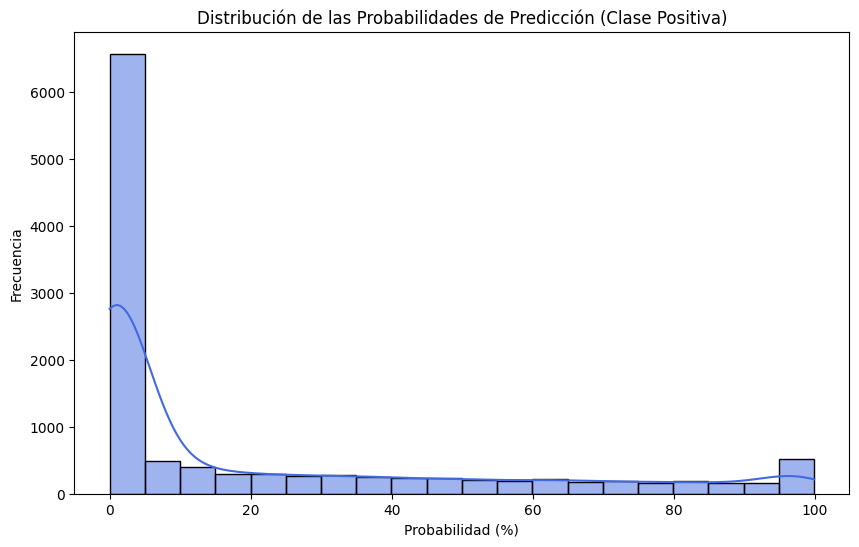

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un histograma con una curva de densidad
plt.figure(figsize=(10, 6))
sns.histplot(pred_probs_percent[:, 1], kde=True, color='royalblue', bins=20)

# Configurar etiquetas y título
plt.xlabel('Probabilidad (%)')
plt.ylabel('Frecuencia')
plt.title('Distribución de las Probabilidades de Predicción (Clase Positiva)')

# Mostrar la gráfica
plt.show()

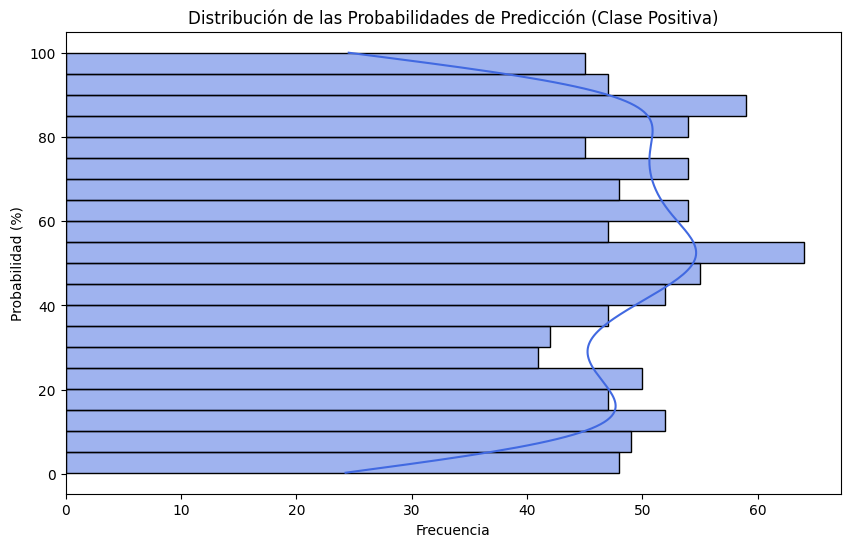

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Datos de ejemplo (probabilidades de predicción en porcentaje)
np.random.seed(42)
pred_probs_percent = np.random.rand(1000, 2) * 100  # Simulación de probabilidades

# Crear un histograma con los ejes invertidos
plt.figure(figsize=(10, 6))
sns.histplot(y=pred_probs_percent[:, 1], kde=True, color='royalblue', bins=20)

# Configurar etiquetas y título
plt.xlabel('Frecuencia')
plt.ylabel('Probabilidad (%)')
plt.title('Distribución de las Probabilidades de Predicción (Clase Positiva)')

# Mostrar la gráfica
plt.show()